In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import zipfile
import pandas as pd
import pyarrow.parquet as pq
#import matplotlib.pyplot as plt
#import numpy as np

WORK_PATH = '/content/gdrive/MyDrive/DataFusionContest/'

In [ ]:
!python -m pip install python-snappy

     |████████████████████████████████| 61kB 4.1MB/s 


In [ ]:
!python -m pip install fastparquet

     |████████████████████████████████| 122kB 8.9MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
  Created wheel for fastparquet: filename=fastparquet-0.5.0-cp36-cp36m-linux_x86_64.whl size=211214 sha256=3e2de04f269f9e82ff2a0b0a4e2ef7d866d6ecd4dc7dd65bf46dd4811e7168b9
  Stored in directory: /root/.cache/pip/wheels/97/0e/da/e2122965947ab2bfbc20e31a968e998fc8932f7fcb0ed78ad0
  Created wheel for thrift: filename=thrift-0.13.0-cp36-cp36m-linux_x86_64.whl size=345212 sha256=32e6409af4c8c6fc6e02f127a31163844599f29f5e43108029d5b99749bd8988
  Stored in directory: /root/.cache/pip/wheels/02/a2/46/689ccfcf40155c23edc7cdbd9de488611c8fdf49ff34b1706e
Successfully built fastparquet thrift


In [ ]:
from fastparquet import ParquetFile
import numpy as np

pf = ParquetFile(WORK_PATH + 'train.parquet')
# Для чтения частями:
#for df in pf.iter_row_groups():
#    print(df.shape)
# Чтение файла целиком:
filter=[('category_id', '!=', -1)]
df = pf.to_pandas(columns=['item_name', 'category_id'], filters=filter)
print(df.shape)

(26094077, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26094077 entries, 0 to 45729315
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   item_name    object
 1   category_id  int64 
dtypes: int64(1), object(1)
memory usage: 597.2+ MB


In [ ]:
print(df['item_name'].head(10))

0                      Флуконазол капс 150мг №1 Вертекс
1                                        Молоко 3,2%,шт
2      Борщ Станичный с тушенкой, 103 ккал (завод, з/у)
3                             Компот из изюма, 114 ккал
4     Макаронные изделия отварные (масло сливочное),...
6                  Филе Горизонт (филе птицы), 218 ккал
10                         3  Бумага Упак 1/Прочи/В асс
11                         4  Бумага Упак 1/Прочи/В асс
12                          Брюки спорт мал SAMO M-1016
13                                    Бюстгальтер БН137
Name: item_name, dtype: object


In [ ]:
df = pd.read_parquet(WORK_PATH + 'train.parquet', columns=['item_name', 'category_id']) #, filters=[('category_id', '=', val)])
#df = pd.read_parquet(WORK_PATH + 'train.parquet', engine='pyarrow') #, chunksize=1000)
#dq = pq.ParquetFile(WORK_PATH + 'train.parquet')
#print(dq.metadata)
#print(dq.schema)
df.info()
#dq1 = pq.read_table(WORK_PATH + 'train.parquet', columns=['receipt_id ', 'item_name', 'category_id'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26094077 entries, 0 to 45729315
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   item_name    object
 1   category_id  int64 
dtypes: int64(1), object(1)
memory usage: 597.2+ MB


In [ ]:
print(df['category_id'].min())
print(df['category_id'].max())

-1
204


In [ ]:
print(df.head(10))

                                            item_name  category_id
0                    Флуконазол капс 150мг №1 Вертекс           -1
1                                      Молоко 3,2%,шт           78
2    Борщ Станичный с тушенкой, 103 ккал (завод, з/у)           -1
3                           Компот из изюма, 114 ккал           71
4   Макаронные изделия отварные (масло сливочное),...           71
6                Филе Горизонт (филе птицы), 218 ккал           -1
10                       3  Бумага Упак 1/Прочи/В асс           -1
11                       4  Бумага Упак 1/Прочи/В асс           -1
12                        Брюки спорт мал SAMO M-1016           -1
13                                  Бюстгальтер БН137           -1


In [ ]:
df2 = df.query('category_id >= 0')
print(df2.head(10))

                                            item_name  category_id
1                                      Молоко 3,2%,шт           78
3                           Компот из изюма, 114 ккал           71
4   Макаронные изделия отварные (масло сливочное),...           71
17                      Кофе Капучино Большой Эден 18           70
40                             Хлеб на СЫВОРОТКЕ 350г           84
53                     Сосиска в тесте с сыром 1шт ГЕ           84
58     ЛанчБаскет 5 за 300: 2 шт ОРИГ Стрипсы кур фил           69
62                                Станд Картофель фри           69
63                                 Хот-дог Куриный СБ           69
64                               Чизбургер с луком СБ           68


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6483226 entries, 1 to 45729281
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   item_name    object
 1   category_id  int64 
dtypes: int64(1), object(1)
memory usage: 148.4+ MB


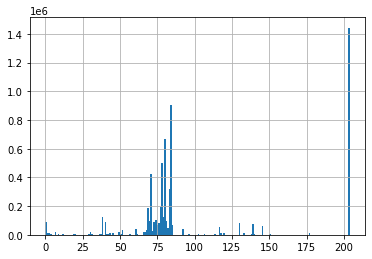

In [ ]:
df2['category_id'].hist(bins=200)

In [ ]:
print(df2['category_id'].min())
print(df2['category_id'].max())
print(len(df2['category_id'].unique()))

0
204
98


In [ ]:
ptable = pd.pivot_table(df2, index=['category_id'], values='item_name', aggfunc='count')
print(ptable)

             item_name
category_id           
0                92280
1                  226
2                15502
3                12159
4                 3930
...                ...
164               1388
167               2064
177              11764
203            1307260
204             136271

[98 rows x 1 columns]


In [ ]:
print(ptable['item_name'].median())
m = int(ptable['item_name'].median())

5576.0


In [ ]:
print(list(ptable['item_name']))
print(list(ptable.index))

[92280, 226, 15502, 12159, 3930, 1814, 17756, 2569, 1435, 4657, 801, 5774, 5378, 1149, 1470, 1787, 5298, 17168, 4194, 480, 7838, 4687, 126410, 507, 88427, 2871, 4804, 14362, 14597, 67, 16274, 9015, 26690, 6160, 1646, 456, 444, 690, 5933, 356, 1158, 39821, 6749, 16823, 21723, 30077, 186312, 94482, 422085, 24865, 88121, 101648, 69004, 80476, 193369, 503199, 126837, 670833, 93440, 45508, 322656, 902507, 67961, 1642, 41629, 2443, 109, 312, 626, 459, 3695, 741, 183, 2377, 406, 1988, 612, 4939, 1710, 55324, 15353, 10836, 1, 1914, 80566, 10960, 2565, 71907, 3252, 25, 64365, 3783, 2042, 1388, 2064, 11764, 1307260, 136271]
[0, 1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 19, 20, 24, 26, 27, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 90, 92, 96, 97, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 114, 115, 117, 118, 120, 121, 128, 130, 133, 138, 139, 140, 143, 14

In [ ]:
countItems = list(ptable['item_name'])
idCategory = list(ptable.index)

In [ ]:
dfResult = pd.DataFrame(columns=['item_name', 'category_id'])
for i in range(len(countItems)):
    newQuery = 'category_id == ' + str(idCategory[i])
    dfTemp = df.query(newQuery)
    if len(dfTemp) > m:
        dfTemp = dfTemp.sample(frac=1)
        dfTemp = dfTemp.head(m)
    else:
        while len(dfTemp) < m:
            dfTemp = dfTemp.append(dfTemp)
        dfTemp = dfTemp.head(m)
        dfTemp = dfTemp.sample(frac=1)
    print(newQuery)
    dfResult = dfResult.append(dfTemp)
    dfResult = dfResult.sample(frac=1)
print(dfResult.shape)

category_id == 0
category_id == 1
category_id == 2
category_id == 3
category_id == 4
category_id == 6
category_id == 7
category_id == 9
category_id == 11
category_id == 12
category_id == 13
category_id == 19
category_id == 20
category_id == 24
category_id == 26
category_id == 27
category_id == 29
category_id == 30
category_id == 31
category_id == 35
category_id == 36
category_id == 37
category_id == 38
category_id == 39
category_id == 40
category_id == 41
category_id == 42
category_id == 43
category_id == 45
category_id == 46
category_id == 49
category_id == 50
category_id == 51
category_id == 52
category_id == 53
category_id == 54
category_id == 55
category_id == 56
category_id == 57
category_id == 58
category_id == 60
category_id == 61
category_id == 62
category_id == 66
category_id == 67
category_id == 68
category_id == 69
category_id == 70
category_id == 71
category_id == 72
category_id == 73
category_id == 74
category_id == 75
category_id == 76
category_id == 77
category_id == 78


In [ ]:
import numpy as np

df2['category_id'] = df2['category_id'].astype(np.uint8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dfResult.to_csv(WORK_PATH + 'clean.csv', index=False)

In [ ]:
df3 = df[df.item_name.str.contains('Кофе', case=False)]
print(df3.head(50))

                                               item_name  category_id
17                         Кофе Капучино Большой Эден 18           70
94                Кофе Несткафе голд сигначер 95г стекло           -1
166                               Кофе АМЕРИКАНО средний           70
363                       95 Г КОФЕ РАСТ АМБАСС ПЛАТИНУМ           -1
1061                                 ПЕЧ.К КОФЕ С ШОК ВК           84
1134                              Раф кофе кокосовый, шт           -1
1215                Кофе Грейт Бин Голд 100г стекло (12)           -1
1231                                  0.3 Кофе Американо           70
1681           Кофе растворимый Маккофе Original 3в1 20г           85
1932                         250Г КОФЕ LAVAZZA ORO ЗЕРНО           -1
2519    Кофе Жардин мяг упаковка 150гр. № 4 Гватемала шт           -1
2935                      Кофе Латте Стандартный Эден 18           70
3243              Печенье Кухмастер К кофе сахарное 220г           -1
3619                

In [ ]:
print(df[df['category_id'] == -1].count())

receipt_id     19610851
item_name      19610851
category_id    19610851
dtype: int64


In [ ]:
dfCoffee = df[df.item_name.str.contains('Кофе', case=False)].head(1000)
dfCoffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 17 to 232802
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_name    1000 non-null   object
 1   category_id  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [ ]:
dfCoffee.to_csv(WORK_PATH + 'coffee.csv', index=False)